In [2]:
# importing preferences
import numpy as np
import scipy as scp
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt

In [15]:
# loading data
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

print("shape of independent variables:", X.shape)
print("shape of dependent variables:", y.shape)
print("Column Names:", feature_names)
desc = scp.stats.describe(X)
print("Means: ", desc.mean)
print("variance: ", desc.variance)
df_X = pd.DataFrame(X, columns = feature_names)
print(df_X.describe())

shape of independent variables: (442, 10)
shape of dependent variables: (442,)
Column Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Means:  [-3.63428493e-16  1.30834257e-16 -8.04534920e-16  1.28165452e-16
 -8.83531559e-17  1.32702421e-16 -4.57464634e-16  3.77730150e-16
 -3.83085422e-16 -3.41288202e-16]
variance:  [0.00226757 0.00226757 0.00226757 0.00226757 0.00226757 0.00226757
 0.00226757 0.00226757 0.00226757 0.00226757]
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-

In [16]:
df_X = df_X[['bmi']]
train_X, test_X, train_y, test_y = train_test_split(df_X, y, test_size = 0.05)
print(train_X.shape, test_X.shape)

(419, 1) (23, 1)


In [17]:
lr = linear_model.LinearRegression()
lr.fit(train_X, train_y)
print("Params:", lr.get_params())
print("coef:", lr.coef_)
print("Intercept:",lr.intercept_)

Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
coef: [951.9421208]
Intercept: 151.81286884177544


In [18]:
# predicting on test data
y_pred = lr.predict(test_X)
print(test_y[:5])
print(y_pred[:5])

[190. 202. 206. 142. 292.]
[140.77508614 147.95718912 140.77508614 165.39943922 151.03523326]


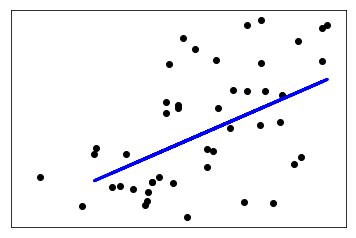

In [19]:
def visualize_boundary(test_X, test_y, y_pred):
    plt.scatter(test_X, test_y, color='black')
    plt.plot(test_X, y_pred, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
visualize_boundary(test_X.values.tolist(), test_y, y_pred)

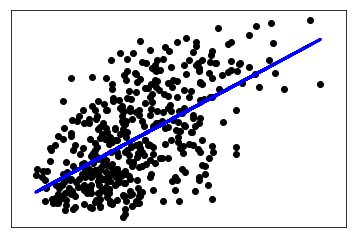

In [20]:
# visualizing entire data
y_pred = lr.predict(df_X)
visualize_boundary(df_X.values.tolist(), y, y_pred)

In [21]:
# creating some random data
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()

# introducing auxiliary noise in the response variable
y[::7] += 3 * (0.37 - np.random.rand(1))

In [22]:
# using SVM model with polynomial kernel
svr_poly = svm.SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(X, y).predict(X)

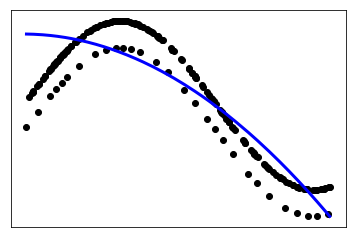

In [23]:
# visualizing non-linear boundaries
visualize_boundary(X, y, y_poly)